In [39]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs


In [40]:
# Pretty display for notebooks
%matplotlib inline

#Load the csv data
data = pd.read_csv("census.csv")

#Display the data
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [41]:
df = pd.DataFrame(data)
# TODO: Total number of records
n_records = data.shape[0]
                            #  or 
                            #  nrecord = len(df.index)


# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(df[df.income == ">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(df[df.income == "<=50K"])


# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k) / float(n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


/home/ratna/Documents/ML/finding_doners/visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


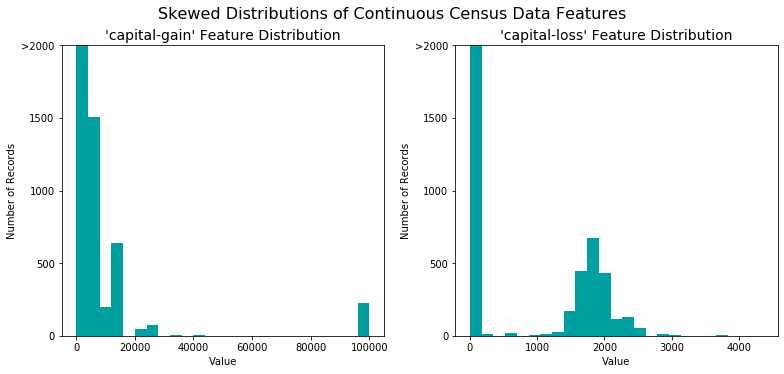

In [42]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

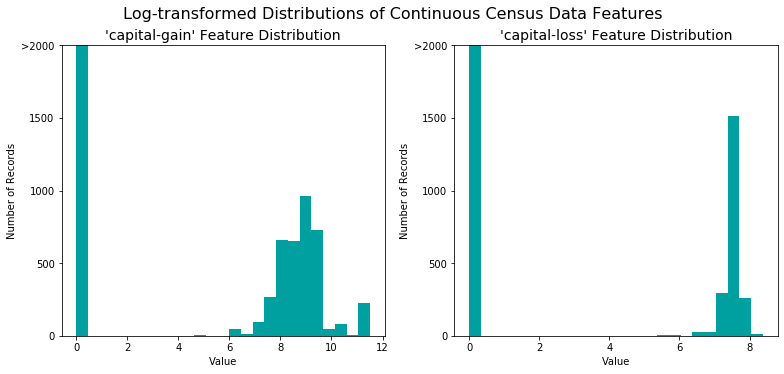

In [43]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x : np.log(x+1))


# Visualize the new log distribution
vs.distribution(features_log_transformed , transformed = True)

In [44]:
# Normalizing Numerical Features
# Import sklearn.preprocessing.StandardScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_maxmin_transform = pd.DataFrame(data = features_log_transformed)
features_log_maxmin_transform[numerical] = scaler.fit_transform(features_log_maxmin_transform[numerical])

## Show an example of a record with scaling applied
display(features_log_maxmin_transform[numerical].head(n = 5))

/home/ratna/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.667492,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959


In [45]:
# Implementing preprocessed data

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_maxmin_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x:1 if x == '>=50k' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} Total features after one hot encoding".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 Total features after one hot encoding
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Ad

In [46]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final , 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set samples are {}".format(X_train.shape[0]))
print("Testing set samples are {}".format(X_test.shape[0]))

Training set samples are 36177
Testing set samples are 9045


In [47]:
# Evaluating model Performance
##  Investigating 4 Algorithms of Supervised Learning

# Naive Predictor
'''
TP = np.sum(income_raw)# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                         #encoded to numerical values done in the data preprocessing step.
FP = income_raw.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

print(TP)
print(FP)
print(TN)
print(FN)

# TODO: Calculate accuracy, precision and recall
accuracy = None
recall = None
precision = None

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = None

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
'''

#  As don't know the values across the details so, calculate dfor random numbers.

# TODO: Calculate accuracy
accuracy = float(11208) / float(45222)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = float((1+.25)*(float(11208)/float(45222*1)))/float(((.25 * float(11208)/float(45222)) + 1))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))



Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [48]:
# Implementation - Creating a training and Predicting Pipeline -

import sklearn
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = int(end - start)
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = int(end - start)
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = int(accuracy_score(y_train[:300], predictions_train))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = int(accuracy_score(y_test, predictions_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = int(fbeta_score(y_train[:300], predictions_train ,  average = 'binary' , beta = 0.5))
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = int(fbeta_score(y_test, predictions_test ,  average = 'binary' , beta = 0.5))
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results




AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


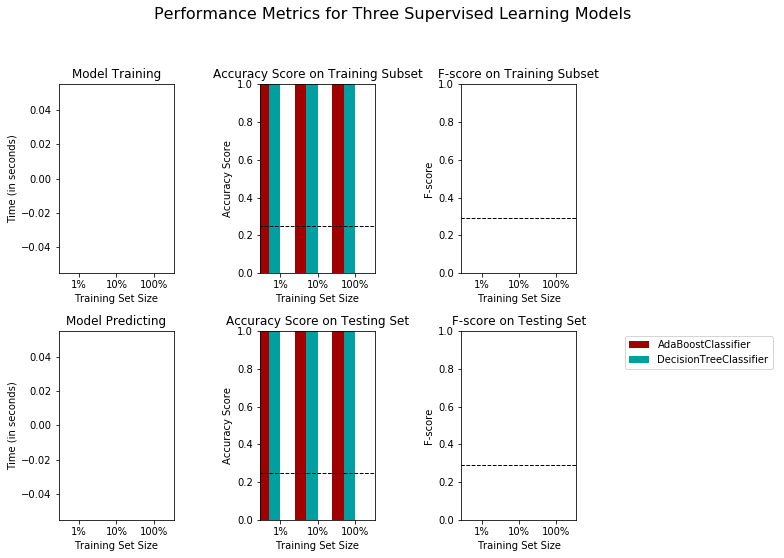

In [49]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = 1)
clf_B = DecisionTreeClassifier(random_state = 1)
# clf_C = SVC(random_state = 1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(len(y_train) / 10)
samples_1 = int(len(y_train) / 100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)



In [50]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state = 1)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators' : [50,75,100,200], 'learning_rate' : [0.5,0.8,1,1.2]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
display(pd.DataFrame(grid_obj.cv_results_))



/home/ratna/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 0.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 0.0000


/home/ratna/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ratna/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ratna/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ratna/.local/lib/python3.6/site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.023795,0.002517,0.007792,0.001638,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,0.020928,0.002897,0.006286,0.000293,0.5,75,"{'learning_rate': 0.5, 'n_estimators': 75}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,0.018757,0.000213,0.005945,0.000079,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,0.018400,0.000080,0.006161,0.000437,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
4,0.018982,0.000277,0.005817,0.000033,0.8,50,"{'learning_rate': 0.8, 'n_estimators': 50}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,0.018598,0.000219,0.005896,0.000050,0.8,75,"{'learning_rate': 0.8, 'n_estimators': 75}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
6,0.018363,0.000064,0.005921,0.000057,0.8,100,"{'learning_rate': 0.8, 'n_estimators': 100}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
7,0.018728,0.000505,0.006061,0.000312,0.8,200,"{'learning_rate': 0.8, 'n_estimators': 200}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
8,0.025204,0.003699,0.008119,0.002889,1,50,"{'learning_rate': 1, 'n_estimators': 50}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
9,0.021741,0.001288,0.008757,0.001817,1,75,"{'learning_rate': 1, 'n_estimators': 75}",0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


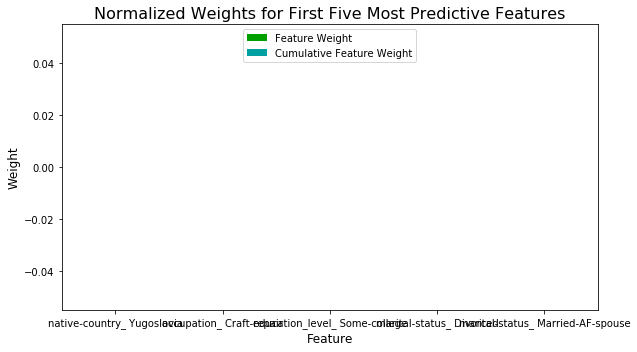

In [51]:
# TODO: Import a supervised learning model that has 'feature_importances_'

from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set 
clf = AdaBoostClassifier(random_state = 1)
model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

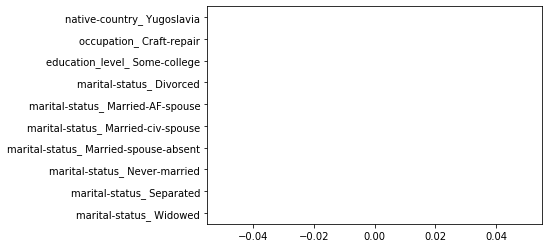

In [52]:
# look at top "n" feature importances
n = 10
fi = model.feature_importances_
pd.Series(fi, index=X_train.columns).sort_values()[-n:].plot(kind='barh');

In [53]:
# Feature Selection

# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 1.0000
F-score on testing data: 0.0000

Final Model trained on reduced data
------
Accuracy on testing data: 1.0000
F-score on testing data: 0.0000
